In [50]:
pip install tpot 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from tpot import TPOTClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [52]:
df=pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
df.shape

(303, 14)

In [54]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [55]:
x=df.drop('target',axis=1)
y=df['target']

In [56]:
scaler=StandardScaler()
scaling=scaler.fit_transform(x)
x=pd.DataFrame(scaling,columns=df.drop('target',axis=1).columns)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [57]:
final=pd.concat([x,y],axis=1)
final.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


In [58]:
#sns.pairplot(final)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


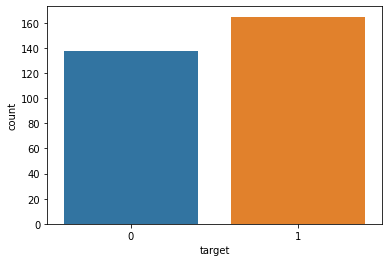

In [59]:
sns.countplot(y)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


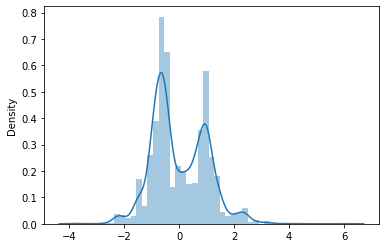

In [60]:
sns.distplot(x)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

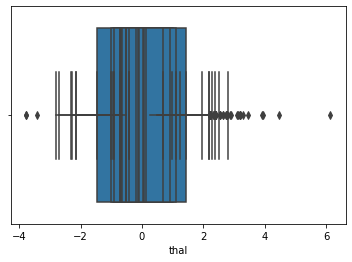

In [61]:
for i in x.columns:
  sns.boxplot(x[i])

In [62]:
def remove_outliers():
    for i in x.columns:
        mean=x[i].mean()
        std=x[i].std()
        upper_bound=mean + (3*std)
        lower_bound= mean - (3*std)
        x[i]=np.where(x[i]>upper_bound,upper_bound,x[i])
        x[i]=np.where(x[i]<lower_bound,lower_bound,x[i])
        

remove_outliers()        

In [63]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

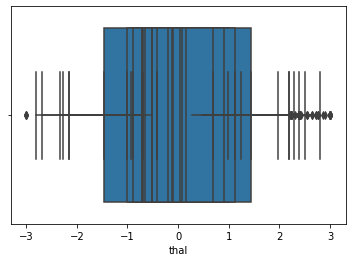

In [64]:
for i in x.columns: 
   sns.boxplot(x[i])

In [65]:
x.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.283153,0.209087,0.121308,-0.116211,-0.398369,0.096801,0.211900,-0.168814,0.282312,0.068144
sex,-0.098447,1.000000,-0.049353,-0.054222,-0.190477,0.045032,-0.058196,-0.043244,0.141664,0.104022,-0.030711,0.117229,0.211751
cp,-0.068653,-0.049353,1.000000,0.051122,-0.092538,0.094444,0.044421,0.295786,-0.394280,-0.146091,0.119717,-0.184317,-0.164473
trestbps,0.283153,-0.054222,0.051122,1.000000,0.138115,0.173652,-0.111325,-0.049353,0.065358,0.185794,-0.117927,0.099308,0.058075
chol,0.209087,-0.190477,-0.092538,0.138115,1.000000,0.016518,-0.146837,-0.016199,0.078761,0.062272,0.002376,0.084098,0.089609
fbs,0.121308,0.045032,0.094444,0.173652,0.016518,1.000000,-0.084189,-0.009208,0.025665,0.009291,-0.059894,0.138926,-0.027415
restecg,-0.116211,-0.058196,0.044421,-0.111325,-0.146837,-0.084189,1.000000,0.045623,-0.070733,-0.058412,0.093045,-0.074503,-0.012477
thalach,-0.398369,-0.043244,0.295786,-0.049353,-0.016199,-0.009208,0.045623,1.000000,-0.381577,-0.349749,0.387649,-0.218982,-0.102644
exang,0.096801,0.141664,-0.394280,0.065358,0.078761,0.025665,-0.070733,-0.381577,1.000000,0.295690,-0.257748,0.117831,0.212403
oldpeak,0.211900,0.104022,-0.146091,0.185794,0.062272,0.009291,-0.058412,-0.349749,0.295690,1.000000,-0.576352,0.225646,0.208687


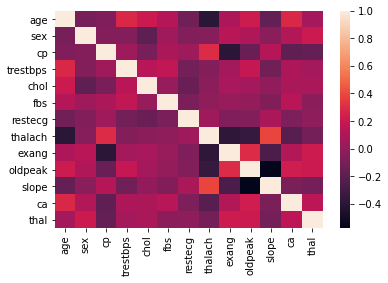

In [66]:
sns.heatmap(x.corr())

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [68]:
a=RandomForestClassifier()
param1={
    'n_estimators':[int(x) for x in np.linspace(100,200,10)],
    'max_depth':[x for x in np.linspace(1,20,10)],
    'criterion': ['gini','entropy'],
    'min_samples_split': [0.5,1,1.5,0],
    'min_samples_leaf': [0,0.5,1,1.5],
    'max_features':['auto','sqrt','log2']
}

In [69]:
b=SVC()
param2={
    'C':[x for x in np.linspace(1,5,3)],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[ x for x in np.linspace(2,8,4)],
    'gamma':['scale', 'auto']
}

In [70]:
c= KNeighborsClassifier()
param3={
    'n_neighbors': [int(x) for x in np.linspace(1,30,15)],
    'weights': ['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
    'leaf_size': [int(x) for x in np.linspace(20,50,15)]
}

In [71]:
tpot= TPOTClassifier(
generations=4,
population_size=24, offspring_size=12, verbosity=2,cv=4,
early_stop=12, config_dict={
    'sklearn.ensemble.RandomForestClassifier':param1
} , scoring='accuracy'   
    
)

model = tpot.fit(x_train,y_train)


Generation 1 - Current best internal CV score: 0.8349056603773586

Generation 2 - Current best internal CV score: 0.8349056603773586

Generation 3 - Current best internal CV score: 0.8349056603773586

Generation 4 - Current best internal CV score: 0.8349056603773586

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), criterion=gini, max_depth=11.555555555555555, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.5, n_estimators=100)


In [83]:
y_pred=tpot.predict(x_test)

In [84]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[32  9]
 [ 4 46]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.84      0.92      0.88        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



In [85]:
final=RandomForestClassifier(criterion='gini', max_depth=5.222222222222222, max_features='auto',
                             min_samples_leaf=1, min_samples_split=0.5, n_estimators=166)

In [86]:
final.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5.222222222222222,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.5, min_weight_fraction_leaf=0.0,
                       n_estimators=166, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [87]:
y_pred=final.predict(x_test)

In [88]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[32  9]
 [ 4 46]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.84      0.92      0.88        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



In [89]:
pickle.dump(final,open('heart_disease_prediction',mode='wb'))